# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
from jupyterthemes import jtplot
jtplot.style(theme='monokai')
# 設定 data_path
dir_data = './data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
# 計算任意欄位的平均數及標準差
app_train.describe().round(1)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.0,307511.0,307511.0,307511.0,307511.0,307499.0,307233.0,307511.0,307511.0,307511.0,...,307511.0,307511.0,307511.0,307511.0,265992.0,265992.0,265992.0,265992.0,265992.0,265992.0
mean,278180.5,0.1,0.4,168797.9,599026.0,27108.6,538396.2,0.0,-16037.0,63815.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.3,1.9
std,102790.2,0.3,0.7,237123.1,402490.8,14493.7,369446.5,0.0,4364.0,141275.8,...,0.1,0.0,0.0,0.0,0.1,0.1,0.2,0.9,0.8,1.9
min,100002.0,0.0,0.0,25650.0,45000.0,1615.5,40500.0,0.0,-25229.0,-17912.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,189145.5,0.0,0.0,112500.0,270000.0,16524.0,238500.0,0.0,-19682.0,-2760.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,278202.0,0.0,0.0,147150.0,513531.0,24903.0,450000.0,0.0,-15750.0,-1213.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
75%,367142.5,0.0,1.0,202500.0,808650.0,34596.0,679500.0,0.0,-12413.0,-289.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
max,456255.0,1.0,19.0,117000000.0,4050000.0,258025.5,4050000.0,0.1,-7489.0,365243.0,...,1.0,1.0,1.0,1.0,4.0,9.0,8.0,27.0,261.0,25.0


count    306073.0
mean     164961.9
std       82188.8
min       25650.0
25%      112500.0
50%      144000.0
75%      202500.0
max      639000.0
Name: AMT_INCOME_TOTAL, dtype: float64

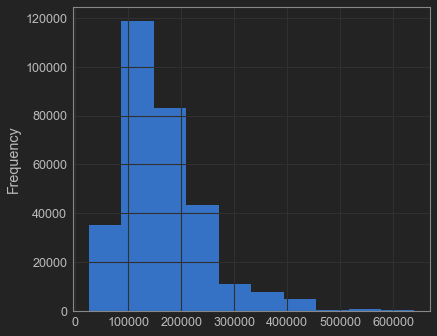

In [40]:
# 畫出任意欄位的直方圖
def remove_outlier(dataset, column, nstd = 2):
    '''
    input: 
        dataset: dataframe
        column: column name (string)
        nstd: define outlier (float)
    output:
        dataframe
    '''
    import numpy as np
    import pandas as pd
    
    df = dataset[np.abs(dataset[column]-dataset[column].mean()) <= (nstd*dataset[column].std())][column]
    return df


income = remove_outlier(app_train, 'AMT_INCOME_TOTAL')
income.plot.hist()
income.describe().round(1)